Train data shape: (17040, 785)
Train data columns: Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)
Test data shape: (10000, 784)
Test data columns: Index(['pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6', 'pixel7',
       'pixel8', 'pixel9', 'pixel10',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=784)
Train data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17040 entries, 0 to 17039
Columns: 785 entries, label to pixel784
dtypes: float64(424), int64(361)
memory usage: 102.1 MB
None
Test data info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Columns: 784 entries, pixel

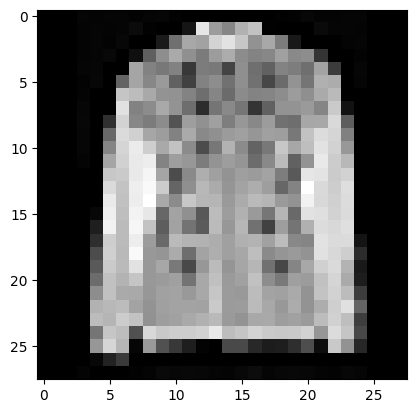

Number of train data - 17040
Number of test data - 10000
x_train shape: (12040, 28, 28, 1) y_train shape: (12040, 10)
12040 train set
5000 validation set
10000 test set


In [11]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.utils import to_categorical
from keras.regularizers import l2

# Загрузка данных из CSV файлов
train_data = pd.read_csv('fmnist_train.csv')
test_data = pd.read_csv('fmnist_test.csv')

# Заполнение пропущенных значений
train_data.fillna(0, inplace=True)
test_data.fillna(0, inplace=True)

# Предварительная обработка данных
train_data.drop(columns=['Id'], inplace=True)
test_data.drop(columns=['Id'], inplace=True)

# Проверка формы и названий столбцов в обучающих данных
print("Train data shape:", train_data.shape)
print("Train data columns:", train_data.columns)

# Проверка формы и названий столбцов в тестовых данных
print("Test data shape:", test_data.shape)
print("Test data columns:", test_data.columns)

# Проведение первичного анализа данных
print("Train data info:")
print(train_data.info())
print("Test data info:")
print(test_data.info())

# Проверка на наличие NaN значений
print("Missing values in train data:")
print(train_data.isnull().sum())
print("Missing values in test data:")
print(test_data.isnull().sum())

# Проверка названий столбцов
print("Train data columns:", train_data.columns)
print("Test data columns:", test_data.columns)

# Проверка первых строк данных
print("First few rows of train data:")
print(train_data.head())
print("First few rows of test data:")
print(test_data.head())


# Разделение данных на изображения, метки и id
if 'id' in train_data.columns:
    y_train = train_data['label'].values
    x_train = train_data.drop(['label', 'id'], axis=1).values
else:
    y_train = train_data['label'].values
    x_train = train_data.drop(['label'], axis=1).values

if 'id' in test_data.columns:
    x_test = test_data.drop(['id'], axis=1).values
else:
    x_test = test_data.values

# Проверка формы данных перед преобразованием
print("Original x_train shape:", x_train.shape)
print("Original x_test shape:", x_test.shape)


# Преобразование данных в необходимую форму
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)

# Определение текстовых меток классов
fashion_mnist_labels = ["T-shirt/top",  # индекс 0
                        "Trouser",      # индекс 1
                        "Pullover",     # индекс 2
                        "Dress",        # индекс 3
                        "Coat",         # индекс 4
                        "Sandal",       # индекс 5
                        "Shirt",        # индекс 6
                        "Sneaker",      # индекс 7
                        "Bag",          # индекс 8
                        "Ankle boot"]   # индекс 9

# Индекс изображения
img_index = 5
# y_train содержит метки, варьирующиеся от 0 до 9
label_index = y_train[img_index]
# Печать метки, например, 2 Pullover
print("y = " + str(label_index) + " " + (fashion_mnist_labels[label_index]))
# Показ одного из изображений из тренировочного набора
plt.imshow(x_train[img_index].reshape(28, 28), cmap='gray')
plt.show()

# Нормализация данных изображений
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

print("Number of train data - " + str(len(x_train)))
print("Number of test data - " + str(len(x_test)))

# Разделение тренировочных данных на тренировочный и валидационный наборы (5000 на валидацию, 55000 на тренировку)
(x_train, x_valid) = x_train[5000:], x_train[:5000]
(y_train, y_valid) = y_train[5000:], y_train[:5000]

# One-hot кодирование меток
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_valid = tf.keras.utils.to_categorical(y_valid, 10)

# Печать формы тренировочного набора
print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

# Печать количества тренировочных, валидационных и тестовых данных
print(x_train.shape[0], 'train set')
print(x_valid.shape[0], 'validation set')
print(x_test.shape[0], 'test set')

In [13]:
# Создание модели Sequential
model = tf.keras.Sequential()

# Определение входной формы в первом слое нейронной сети
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Печать структуры модели
model.summary()

# Компиляция модели
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

from keras.callbacks import ModelCheckpoint

# Использование ModelCheckpoint для сохранения лучших весов модели
checkpointer = ModelCheckpoint(filepath='model.weights.best.keras', verbose=1, save_best_only=True)

print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_valid shape:", x_valid.shape)
print("y_valid shape:", y_valid.shape)

# Обучение модели
model.fit(x_train,
          y_train,
          batch_size=42,  # текущий batch size
          epochs=84,
          validation_data=(x_valid, y_valid),
          callbacks=[checkpointer])

# Загрузка весов с лучшей валидационной точностью
model.load_weights('model.weights.best.keras')

# Оценка модели на тестовом наборе
score = model.evaluate(x_test, verbose=0)

# Печать точности на тестовом наборе
print('\n', 'Test accuracy:', score[1])

# Предсказание на тестовых данных
y_hat = model.predict(x_test)



Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 28, 28, 64)        320       
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 14, 14, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_15 (Dropout)        (None, 14, 14, 64)        0         
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 32)        8224      
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 7, 7, 32)          0         
 ng2D)                                                           
                                                                 
 dropout_16 (Dropout)        (None, 7, 7, 32)         

In [14]:

# Предобработка тестовых данных
# Нормализация данных изображений
X_test = test_data.astype('float32') / 255

# Преобразование формы тестовых данных
X_test = X_test.values.reshape(-1, 28, 28, 1)

# Предсказания на тестовом наборе данных
predictions = model.predict(X_test)

# Преобразование предсказаний в метки классов
predicted_labels = np.argmax(predictions, axis=1)

# Создание DataFrame для результатов
submission_df = pd.DataFrame({'Id': range(len(predicted_labels)), 'Label': predicted_labels})

# Сохранение результатов в файле
submission_df.to_csv('submission6.csv', index=False)

313/313 [==============================] - 3s 10ms/step
